'Overall_Rating', 'Role',	'Age_Range',	'Failure_Reason', 'Age_Range', 'Talent_Availability', 'Growth_Challenge', 'Education_Level', 'Growth_Strategy', 'Cultural_Influence', 'Cultural_Influence', 'Funding_Source', 'Collaboration_Level', 'Govt_Regulations', 'Startup_Advantage'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


In [3]:
# Sample data
data = pd.read_csv('/content/Assessment_data.csv')  # Load your dataset

In [4]:
data.head()

,Overall_Rating,Role,Lack of funding,Lack of infrastructure,Market competition,Poor or no electricity,Regulatory challenges,Talent acquisition/retention,All of the above,Government policies,...,Collaboration_Level,They are neither helpful nor obstructive to business operations,They facilitate smooth operations and ensure a level playing field,They occasionally impede business agility and innovation.,They provide some guidance but often add unnecessary bureaucratic burden,They significantly hinder business growth and profitability,Innovative solutions,Local market knowledge,Low operational costs,Skilled workforce
0,Good,Employee,0,0,1,0,0,0,0,0,...,Average,1,0,0,0,0,0,0,1,0
1,Excellent,Investor,1,0,0,0,1,0,0,0,...,Average,1,0,0,0,0,1,0,0,0
2,Average,Employee,1,1,0,0,0,0,0,0,...,Average,0,0,1,0,0,1,0,0,1
3,Average,Employee,1,0,0,0,0,1,0,0,...,Excellent,0,0,1,0,1,0,1,0,1
4,Average,Employee,1,0,1,0,1,0,0,0,...,Average,0,0,1,0,1,0,0,1,0


In [5]:
data['Overall_Rating'] = data['Overall_Rating'].replace({"Very Poor": 0,"Poor":1, "Average":2, "Good":3, "Excellent":4})

In [6]:
data['Role'] = data['Role'].replace({"Employee": 0,"Policymaker":1, "Academic":2, "Investor":3, "Investor":4, "Founder":5})

In [7]:
data['Collaboration_Level'] = data['Collaboration_Level'].replace({"Very Poor": 0,"Poor":1, "Average":2, "Good":3, "Excellent":4})

In [8]:
data['Cultural_Influence'] = data['Cultural_Influence'].replace({"Not at all": 0,"Slightly":1, "Moderately":2, "Significant":3, "Extremely":4})

In [9]:
data['Education_Level'] = data['Education_Level'].replace({"Other": 0,"Secondary School":1, "Training ": 1, "OND/HND":2, "PGD": 2, "Bachelor's Degree":3, "Bsc":3, "Master's Degree":4, "Barrister at Law(BL)":4, "Doctorate/Ph.D":5})

In [10]:
data['Talent_Availability'] = data['Talent_Availability'].replace({"Very Poor": 0,"Poor":1, "Average":2, "Good":3, "Excellent":4})

In [11]:
data['Age_Range'] = data['Age_Range'].replace({"18-24 years": 0,"25-34 years":1, "35-44 years":2, "45-54 years":3, "55-64 years":4, "65 years and above":5})

In [12]:
data.head()

,Overall_Rating,Role,Lack of funding,Lack of infrastructure,Market competition,Poor or no electricity,Regulatory challenges,Talent acquisition/retention,All of the above,Government policies,...,Collaboration_Level,They are neither helpful nor obstructive to business operations,They facilitate smooth operations and ensure a level playing field,They occasionally impede business agility and innovation.,They provide some guidance but often add unnecessary bureaucratic burden,They significantly hinder business growth and profitability,Innovative solutions,Local market knowledge,Low operational costs,Skilled workforce
0,3,0,0,0,1,0,0,0,0,0,...,2,1,0,0,0,0,0,0,1,0
1,4,4,1,0,0,0,1,0,0,0,...,2,1,0,0,0,0,1,0,0,0
2,2,0,1,1,0,0,0,0,0,0,...,2,0,0,1,0,0,1,0,0,1
3,2,0,1,0,0,0,0,1,0,0,...,4,0,0,1,0,1,0,1,0,1
4,2,0,1,0,1,0,1,0,0,0,...,2,0,0,1,0,1,0,0,1,0


In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 60 columns):
 #   Column                                                                                                           Non-Null Count  Dtype
---  ------                                                                                                           --------------  -----
 0   Overall_Rating                                                                                                   212 non-null    int64
 1   Role                                                                                                             212 non-null    int64
 2   Lack of funding                                                                                                  212 non-null    int64
 3   Lack of infrastructure                                                                                           212 non-null    int64
 4   Market competition                                

In [21]:
X = data.drop("Overall_Rating",axis=1)
#Drop the independent variable along the X- axis
y = data['Overall_Rating']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(169, 59)
(43, 59)
(169,)
(43,)


In [24]:
X_train #Visualize the training dataset along the X-axis
y_train #Visualize the training dataset along the y-axis

127    2
108    2
69     1
84     2
97     3
      ..
106    3
14     4
92     2
179    2
102    4
Name: Overall_Rating, Length: 169, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
# Make predictions using the testing set
y_pred_test = model.predict(X_test)

In [28]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the top-performing models
top_models = {
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "Ridge": Ridge()
}

# Define hyperparameters grid for each model
param_grid = {
    "RandomForest": {
        "model__n_estimators": [100, 200, 300]
    },
    "GradientBoosting": {
        "model__n_estimators": [100, 200, 300],
        "model__learning_rate": [0.01, 0.1, 0.5]
    },
    "Ridge": {
        "model__alpha": [0.1, 1.0, 10.0]
    }
}


# Define feature engineering steps
feature_engineering = [
    ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False))
]

# Perform hyperparameter tuning and feature engineering for each top model
refined_models = {}
for model_name, model in top_models.items():
    # Create a pipeline with feature engineering and model
    pipeline = Pipeline(feature_engineering + [("model", model)])

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Store the best model
    refined_models[model_name] = grid_search.best_estimator_

    # Evaluate the performance
    y_pred_test = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    print(f"{model_name}: Best Parameters - {grid_search.best_params_}, MSE: {mse}")

# Select the best refined model based on performance
best_model_name = min(refined_models, key=lambda x: mean_squared_error(y_test, refined_models[x].predict(X_test)))
best_model = refined_models[best_model_name]
print(f"Best Model: {best_model_name}, Best MSE: {mean_squared_error(y_test, best_model.predict(X_test))}")


RandomForest: Best Parameters - {'model__n_estimators': 200}, MSE: 0.9602418604651164
GradientBoosting: Best Parameters - {'model__learning_rate': 0.01, 'model__n_estimators': 100}, MSE: 0.925095139166169
Ridge: Best Parameters - {'model__alpha': 10.0}, MSE: 0.8623854442160974
Best Model: Ridge, Best MSE: 0.8623854442160974


In [30]:
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


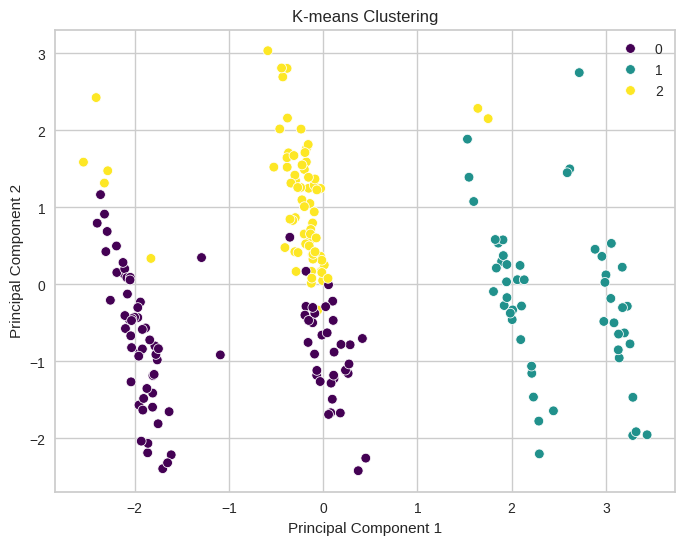

In [31]:
#Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

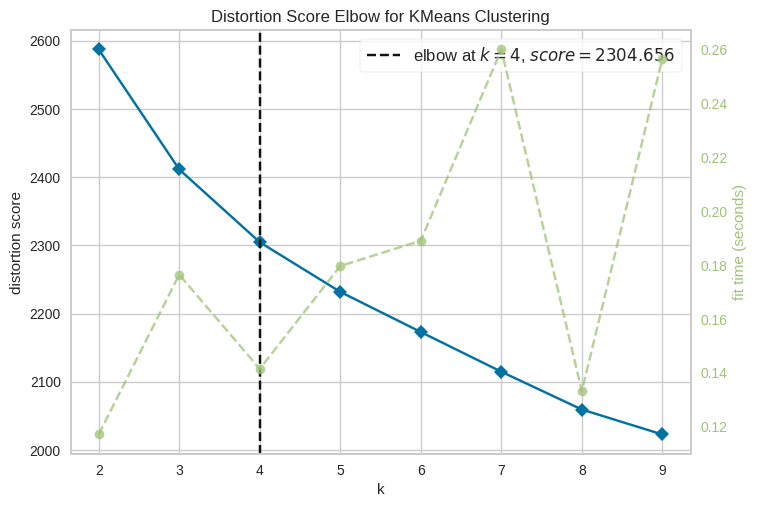

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Determine the optimal number of clusters using the elbow method
elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 10))
elbow_visualizer.fit(X)
elbow_visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


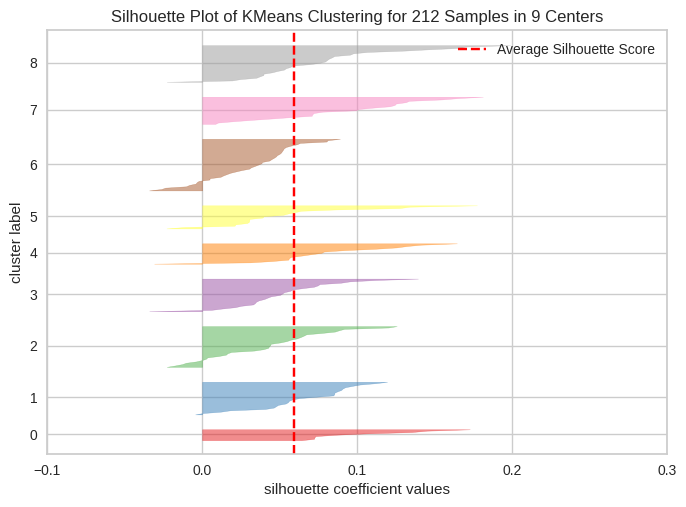

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 212 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# Determine the optimal number of clusters using silhouette analysis
silhouette_visualizer = SilhouetteVisualizer(kmeans)
silhouette_visualizer.fit(X)
silhouette_visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


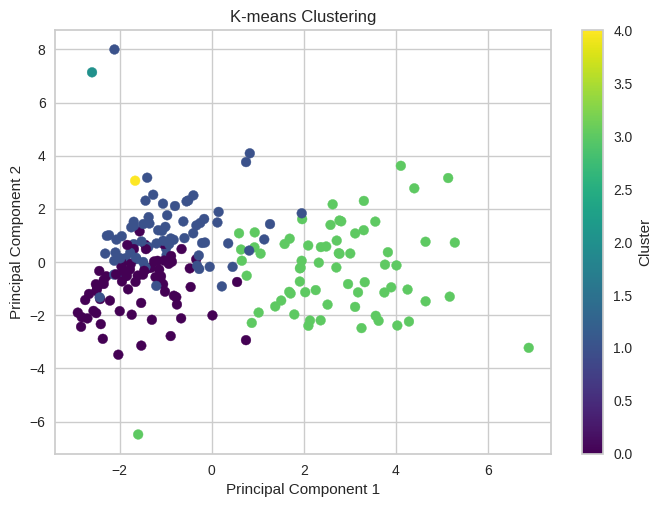

In [38]:
# Feature Scaling (if necessary)
# Since K-means is distance-based algorithm, it's often recommended to scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Visualization (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Interpretation and Insights
# Analyze the clusters and provide detailed explanations

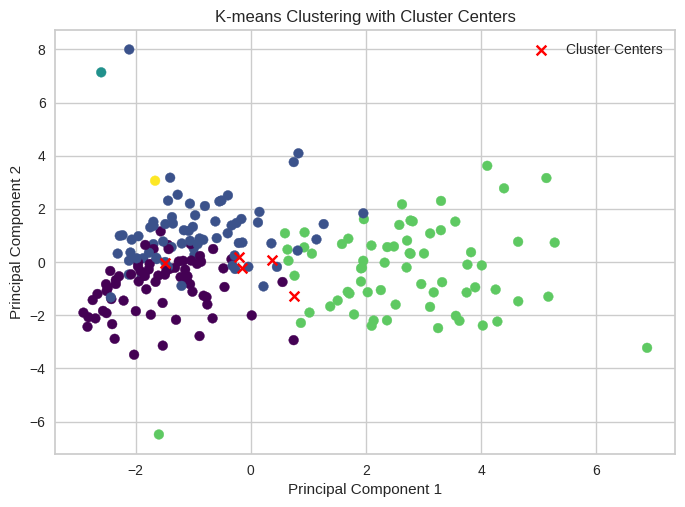

In [39]:
# Deduction 1: Cluster Centers
cluster_centers = kmeans.cluster_centers_
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label='Cluster Centers')
plt.title('K-means Clustering with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [40]:
# Deduction 3: Cluster Profiles
cluster_profiles = pd.DataFrame(scaled_data, columns=data.columns)
cluster_profiles['Cluster'] = clusters
cluster_profiles = cluster_profiles.groupby('Cluster').mean()

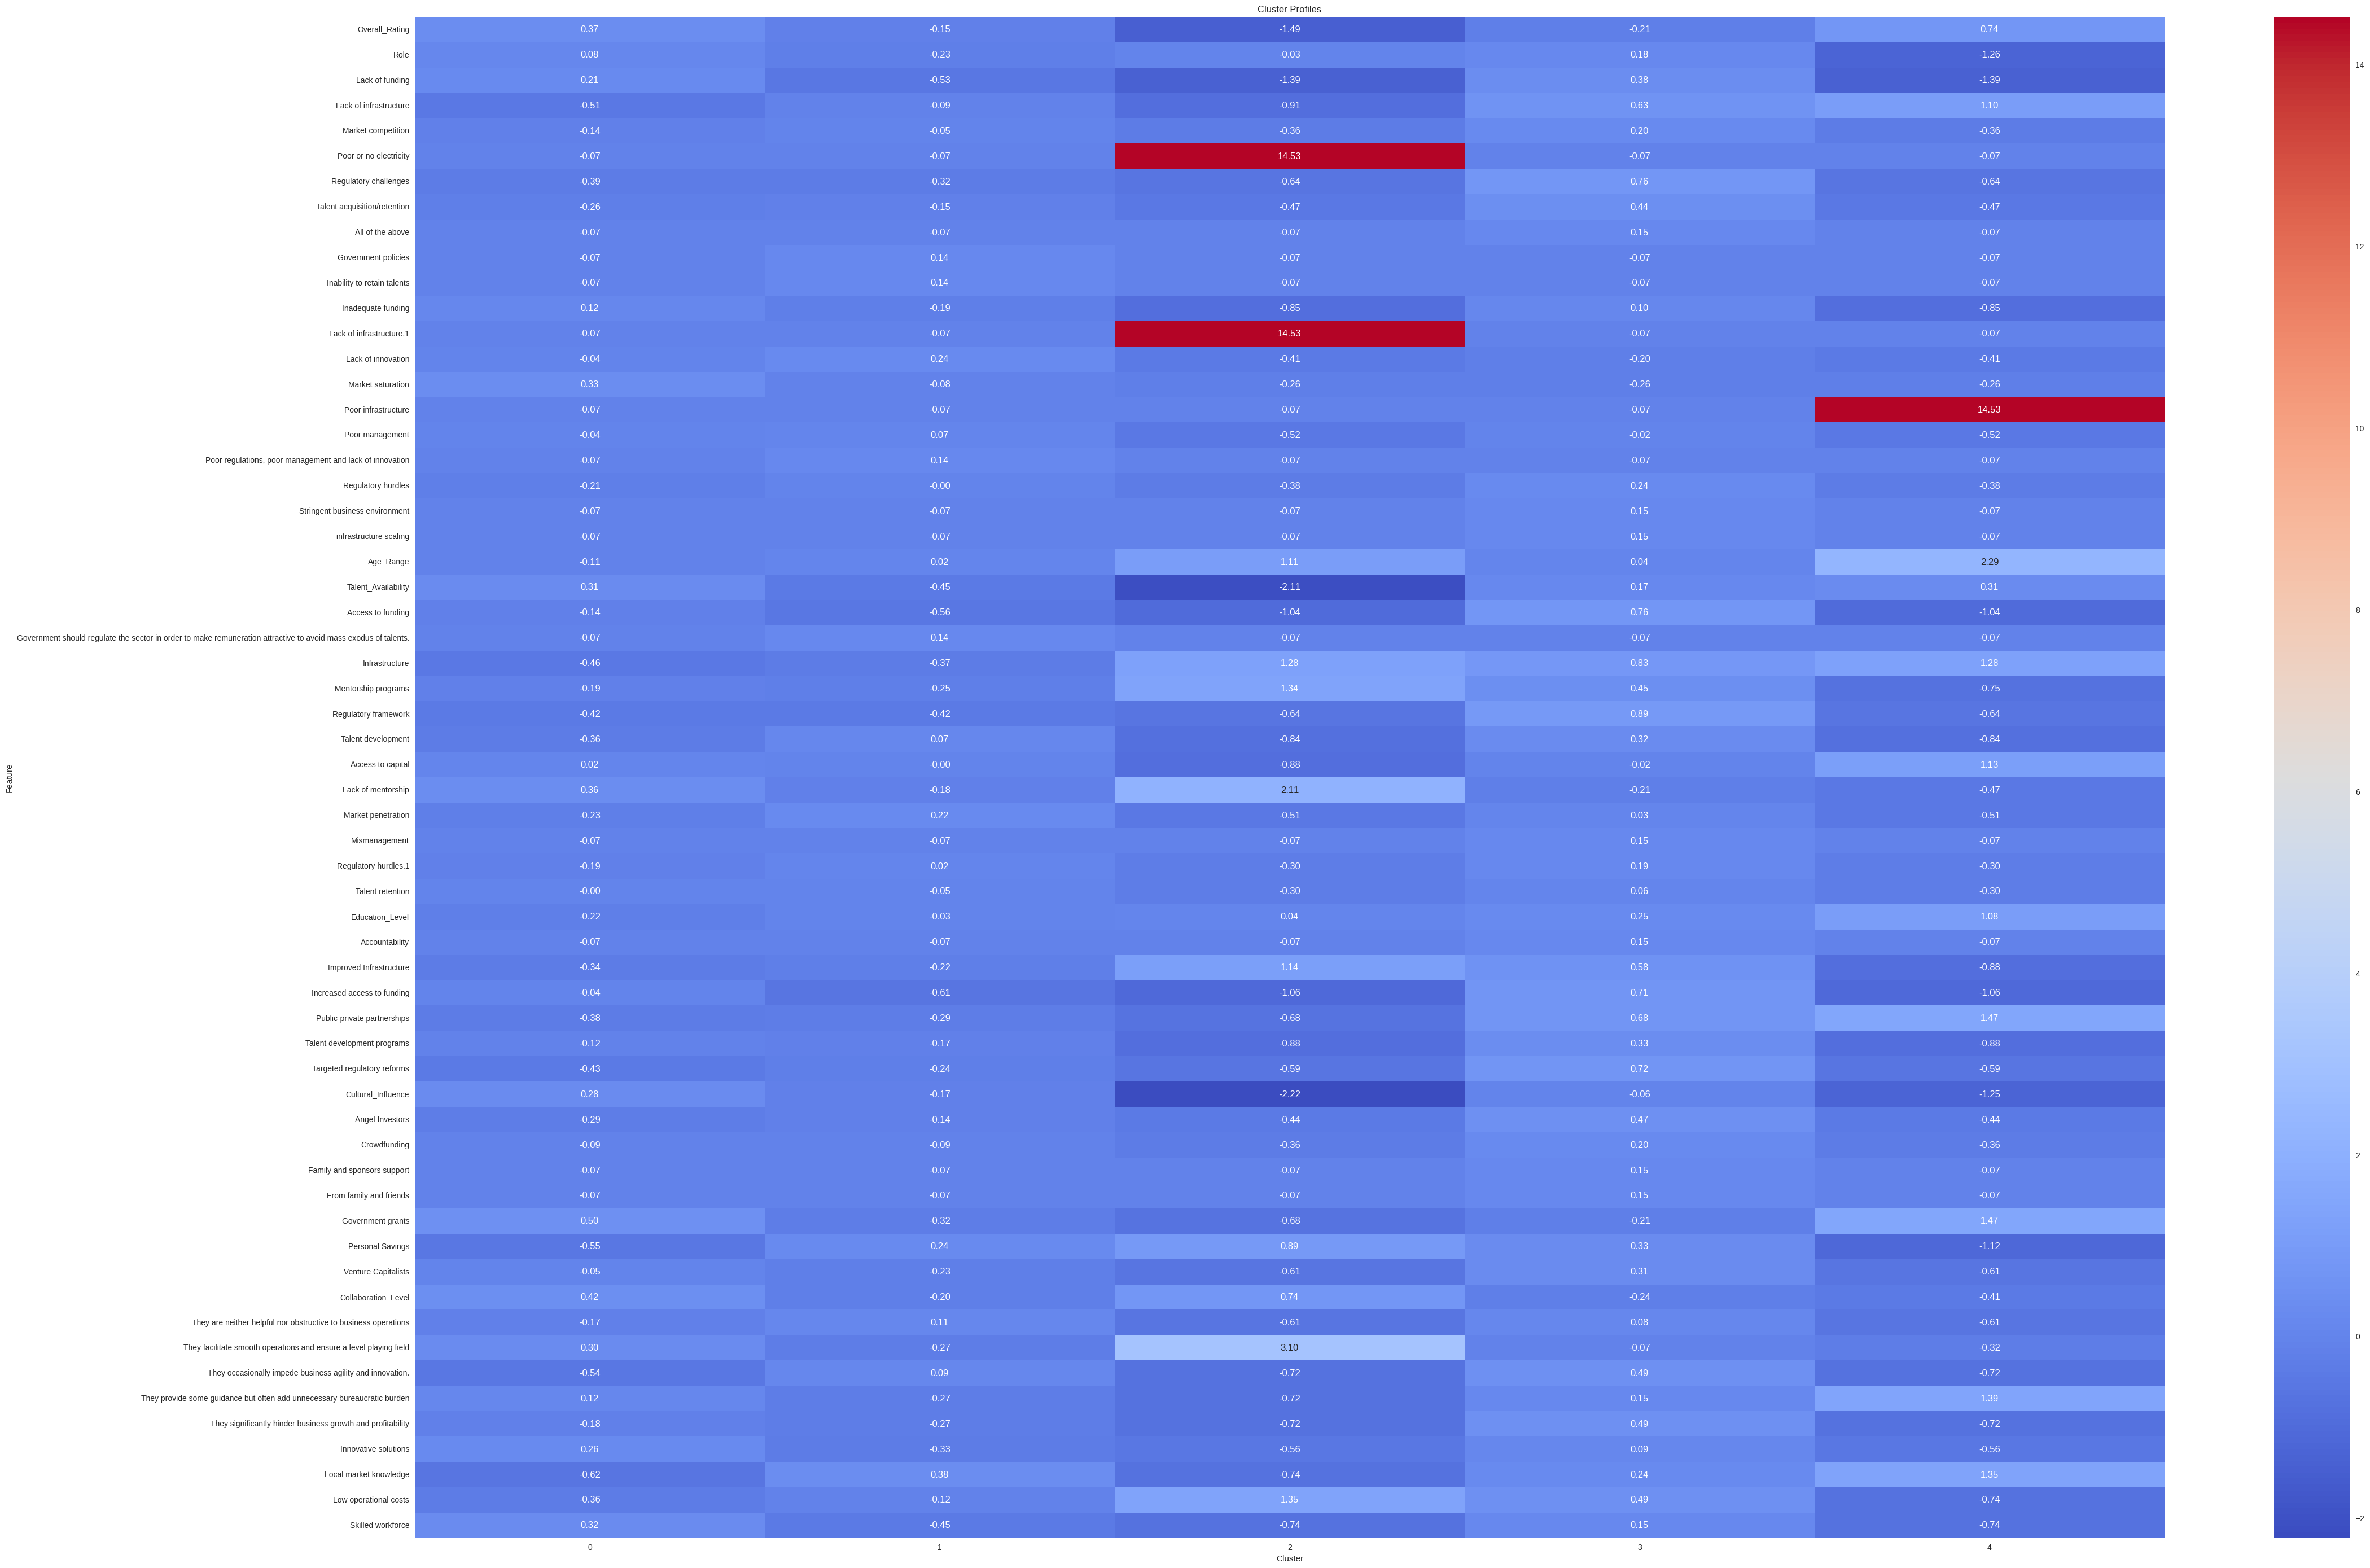

In [43]:
plt.figure(figsize=(50, 35))
sns.heatmap(cluster_profiles.T, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title('Cluster Profiles')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

In [44]:
# View the summary of the correlation of the dataset to see the variable with the most impact
correlation_summary = data.corr()['Overall_Rating']

# Visualize the relationships and correlation of the variables
correlation_matrix = data.corr()

# Set the size of the heatmap plot
plt.figure(figsize=(100, 90))

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

# Set plot title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

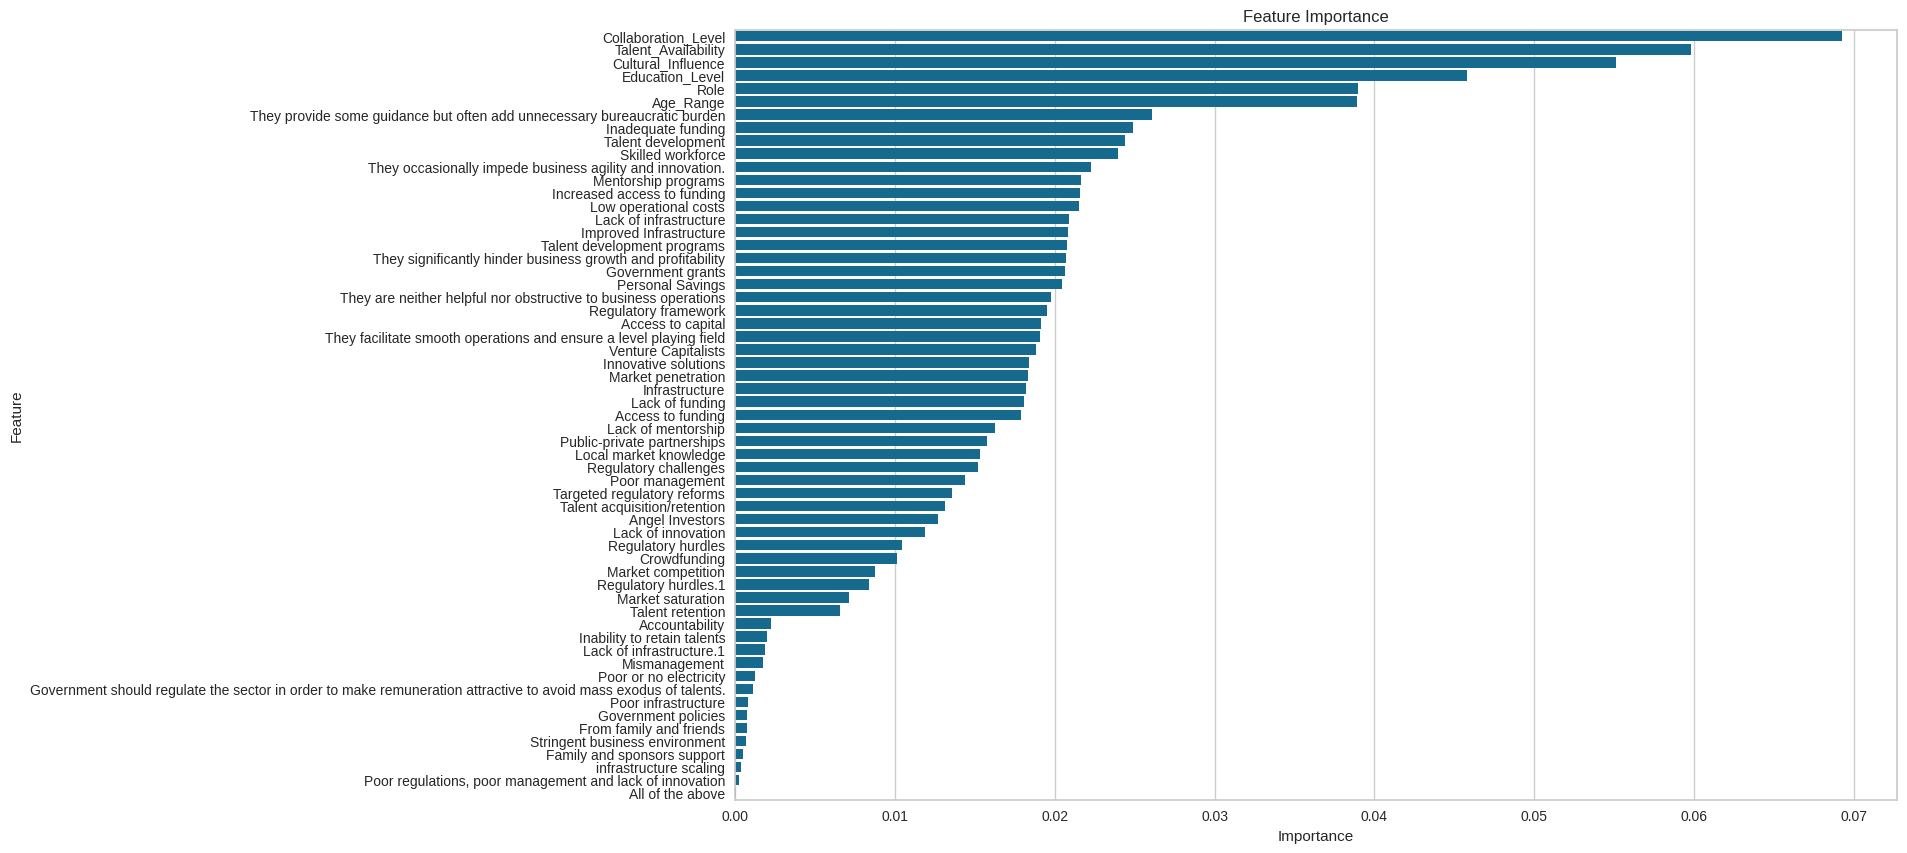

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


X = data.drop("Overall_Rating", axis=1)
y = data['Overall_Rating']

# Train a random forest classifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


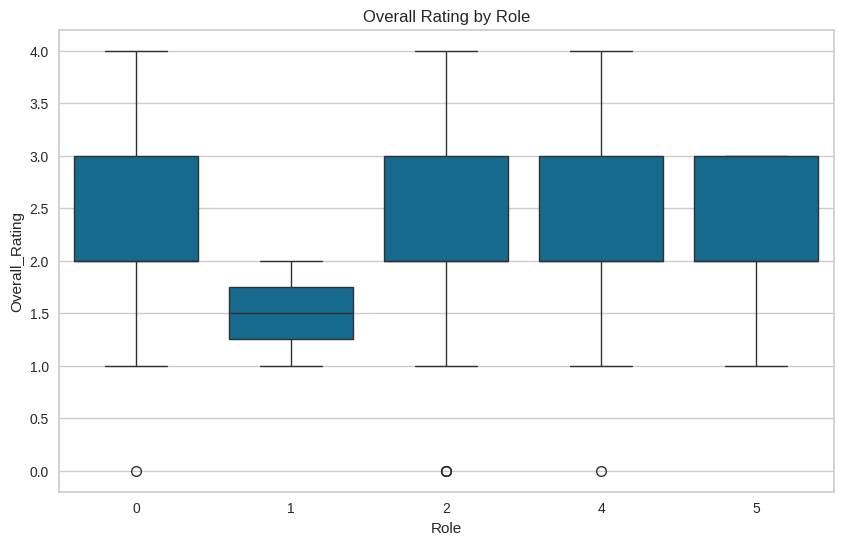

In [46]:
# Boxplot for 'Role'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Role', y='Overall_Rating', data=data)
plt.title('Overall Rating by Role')
plt.show()

# Similarly, create boxplots for other categorical features...


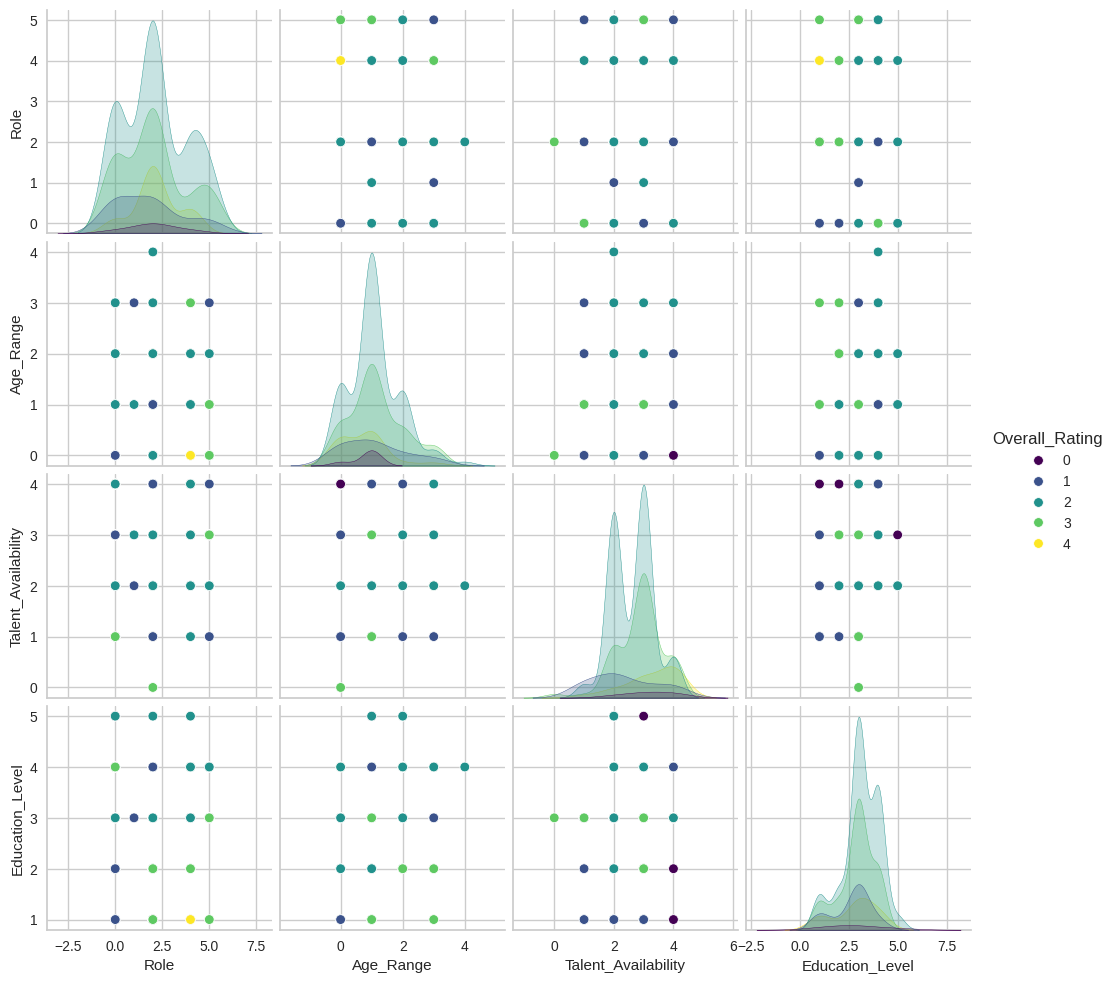

In [47]:
# Select a subset of features for pairplot
selected_features = ['Overall_Rating', 'Role', 'Age_Range', 'Talent_Availability', 'Education_Level']

# Plot pairplot
sns.pairplot(data[selected_features], hue='Overall_Rating', palette='viridis')
plt.show()

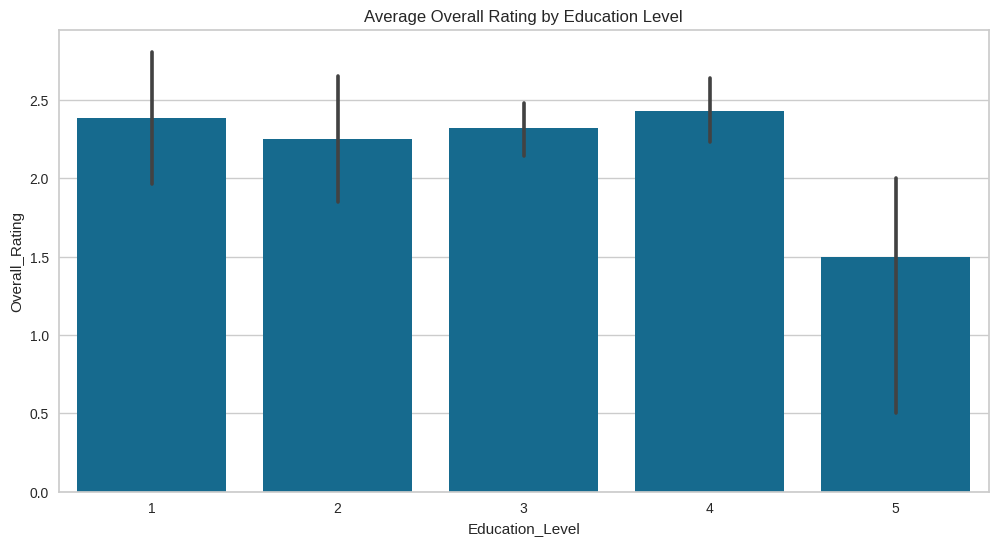

In [48]:
# Bar plot for 'Education_Level'
plt.figure(figsize=(12, 6))
sns.barplot(x='Education_Level', y='Overall_Rating', data=data, estimator=lambda x: sum(x) / len(x))
plt.title('Average Overall Rating by Education Level')
plt.show()